In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pickle

from cartopy.io.shapereader import Reader
import cartopy.crs as ccrs

%matplotlib inline

In [35]:
#read the pickled data
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

#keep a copy of the original data just in case
data_orig = data.copy()

for year in data.keys():
    for key in data[year].keys():
        tmp = data[year][key]
        #bust out the total population and total households from the race and families df
        if key == 'race':
            population = tmp['total_population'].to_frame()
        if key == 'families':
            households = tmp['total_households'].to_frame()
        #convert columns to percentages and drop the total
        tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
        #put the new percentage dataframe back in
        data[year][key] = tmp
    #add the busted out totals to the data dict
    data[year]['population'] = population
    data[year]['households'] = households

In [82]:
#load the census tract shapefiles
tracts_2000 = Reader(os.path.join('census_tract_shapefile', '2000_census_tracts.shp'))
tracts_2010 = Reader(os.path.join('census_tract_shapefile', 'austin_metro_tracts.shp'))

#get number of tracts in each shapefile
n_2000 = sum(1 for _ in tracts_2000.geometries())
n_2010 = sum(1 for _ in tracts_2010.geometries())

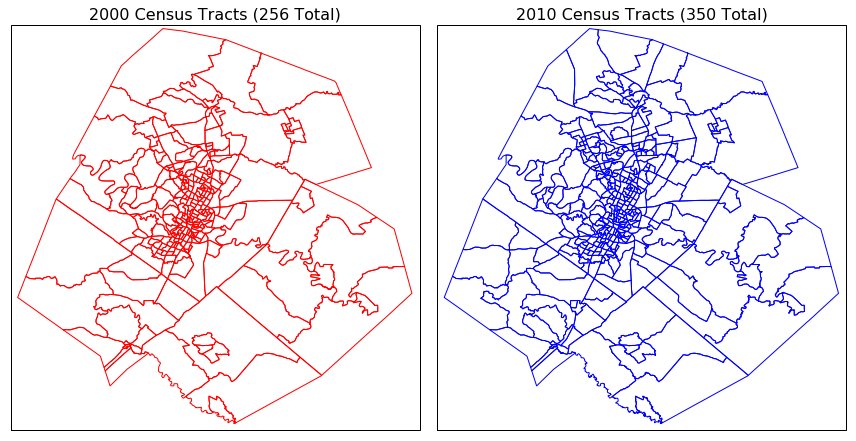

In [83]:
extent = [-98.32, -97, 28.8, 30]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': ccrs.Miller()})

ax1.set_extent(extent)
ax1.add_geometries(tracts_2000.geometries(), ccrs.Miller(), facecolor='none', edgecolor='red')
ax1.set_title('2000 Census Tracts ({} Total)'.format(n_2000), fontdict={'fontsize': 16})

ax2.set_extent(extent)
ax2.add_geometries(tracts_2010.geometries(), ccrs.Miller(), facecolor='none', edgecolor='blue')
ax2.set_title('2010 Census Tracts ({} Total)'.format(n_2010), fontdict={'fontsize': 16})

fig.tight_layout()

In [97]:
list(tracts_2000.records())[0].attributes['TRACT']

'020601'

In [93]:
x.attributes

{'AREA': 0.00604,
 'COUNTY': '491',
 'LSAD': 'TR',
 'LSAD_TRANS': '',
 'NAME': '0206.01',
 'PERIMETER': 0.35282,
 'STATE': '48',
 'TR48_D00_': 2315,
 'TR48_D00_I': 2314,
 'TRACT': '020601'}

In [114]:
c00 = [x.attributes['COUNTY'] for x in tracts_2000.records()]
t00 = [x.attributes['TRACT'] for x in tracts_2000.records()]

In [113]:
t00

['020601',
 '020303',
 '002004',
 '002312',
 '021203',
 '002316',
 '002308',
 '001308',
 '021202',
 '021201',
 '002315',
 '001749',
 '021501',
 '0210',
 '001750',
 '001733',
 '0211',
 '001712',
 '020310',
 '001737',
 '020802',
 '002314',
 '002307',
 '010301',
 '020309',
 '001738',
 '002313',
 '020305',
 '002416',
 '0106',
 '020306',
 '021502',
 '002002',
 '020602',
 '002003',
 '021503',
 '020705',
 '002403',
 '002303',
 '002417',
 '001739',
 '020501',
 '001713',
 '020502',
 '002411',
 '001767',
 '002409',
 '001765',
 '002402',
 '020701',
 '002410',
 '020307',
 '001729',
 '9605',
 '020704',
 '9503',
 '020503',
 '001732',
 '020504',
 '001740',
 '001837',
 '001728',
 '001836',
 '002413',
 '020308',
 '002419',
 '002424',
 '9604',
 '002422',
 '001764',
 '002412',
 '020703',
 '001746',
 '002420',
 '001747',
 '001851',
 '002423',
 '020402',
 '020407',
 '020403',
 '020404',
 '001748',
 '001852',
 '020405',
 '010901',
 '020406',
 '001744',
 '001853',
 '001714',
 '002418',
 '001846',
 '001840',
